In [8]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

sarco =  False
fatigue = False

if sarco:
    name = '2024_02_17_18_56_59'
    env_name = 'myoSarcLegReachFixed-v3'
    steps = 1000
    cut = 100
elif fatigue:
    name = '2024_02_20_15_03_01'
    env_name = 'myoFatiLegReachFixed-v4'
    steps = 2500
    cut = 600
else:
    name = '2024_02_17_20_19_05'
    env_name = 'myoLegReachFixed-v2'
    steps = 1000
    cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [ 10, 25, 40, 55, 70, 85]

In [9]:
AP_pert = []
AP_pert_1, ML_pert_1= [], []#this is only used for the scatter stand/fall plot
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_ML, pert_2_ML, pert_3_ML, pert_4_ML, pert_5_ML = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())
    
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert_1.append(data)
    else:
        ML_pert_1.append(data)

print(len(stand))

67


In [99]:
def check_contact(bos, ft):
    threshold = 5
    indexes = []
    for index, value in enumerate(ft):
        #print(value)
        if value > threshold:
            indexes.append(index)
    # Find indexes where z is above the threshold
    #print(indexes)
    x, y = bos[0], bos[1]
    # Filter x and y based on the threshold condition of z
    if indexes:
        x_filtered = x[indexes]
        y_filtered = y[indexes]
    else: 
        x_filtered, y_filtered = x, y

    bos_filtered = [np.append(x_filtered, x_filtered[0]) , np.append(y_filtered, y_filtered[0])]
    return bos_filtered

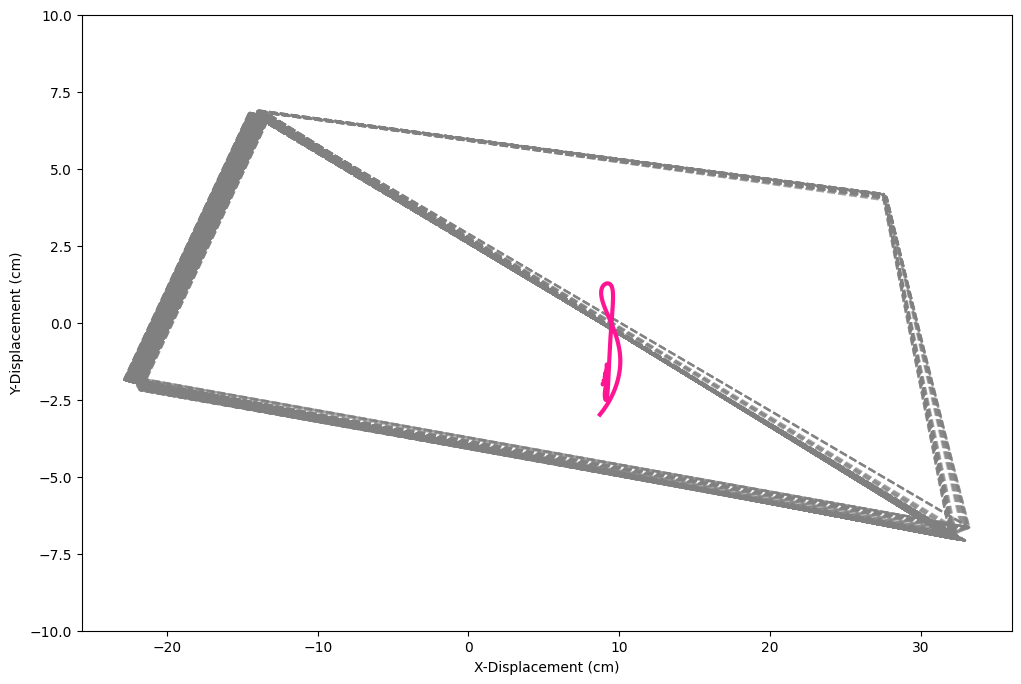

In [100]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (12, 8))

bos_mean = []
com_traj = []
bos_height = []
for m in stand:
    bos_mean.append(m['bodyInfo']['bos'][cut:])#[-1]#.reshape(2, 4).T
    bos_height.append([m['bodyInfo']['grf']['rCal'][cut:], m['bodyInfo']['grf']['lCal'][cut:], 
                                m['bodyInfo']['grf']['lToes'][cut:], m['bodyInfo']['grf']['rToes'][cut:]])
    com_traj.append(m["bodyInfo"]["com"][cut:])
feet_height_mean = np.mean(bos_height, axis = 0).T
bos_final = np.mean(bos_mean, axis = 0)
com_final = np.mean(com_traj, axis = 0)

for i in range(900):
    bos = check_contact(bos_final[i].reshape(2, 4), feet_height_mean[i])
    plt.plot(bos[0]*100+ 3, bos[1]*100 - 8, alpha = 0.3, linestyle = 'dashed', color = 'grey')
plt.plot(com_final[:,0]*100+3, com_final[:,1]*100 - 8, linewidth = 3, color = 'deeppink')
plt.ylabel('Y-Displacement (cm)')
plt.xlabel('X-Displacement (cm)')
plt.ylim([-10, 10])
plt.show()

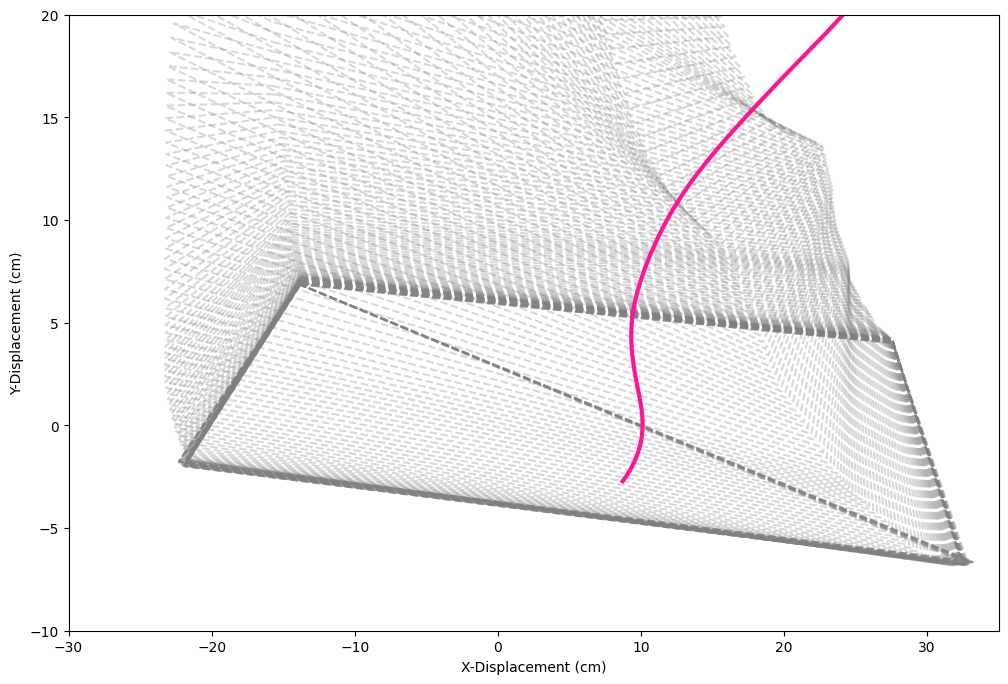

In [101]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (12, 8))

bos_mean = []
com_traj = []
for n in fall:
    bos_mean.append(n['bodyInfo']['bos'][cut:])#[-1]#.reshape(2, 4).T
    bos_height.append([n['bodyInfo']['grf']['rCal'][cut:], n['bodyInfo']['grf']['lCal'][cut:], 
                                n['bodyInfo']['grf']['lToes'][cut:], n['bodyInfo']['grf']['rToes'][cut:]])
    com_traj.append(n["bodyInfo"]["com"][cut:])
feet_height_mean = np.mean(bos_height, axis = 0).T
bos_final = np.mean(bos_mean, axis = 0)
com_final = np.mean(com_traj, axis = 0)

for i in range(900):
    bos = check_contact(bos_final[i].reshape(2, -1), feet_height_mean[i])
    #print(bos)
    plt.plot(bos[0]*100+ 3, bos[1]*100 - 8, alpha = 0.3, linestyle = 'dashed', color = 'grey')
plt.plot(com_final[:,0]*100+3, com_final[:,1]*100 - 8, linewidth = 3, color = 'deeppink')
plt.ylabel('Y-Displacement (cm)')
plt.xlabel('X-Displacement (cm)')
plt.ylim([-10, 20])
plt.xlim([-30, 35])
plt.show()